In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib notebook

In [2]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [19]:
look_up_fruitname = dict(zip(fruits['fruit_label'].unique(), fruits['fruit_name'].unique()))
look_up_fruitname

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

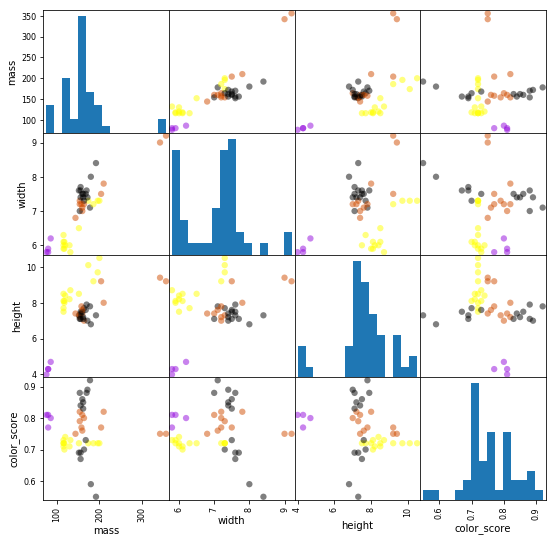

In [11]:
# plot scatter matrix
from matplotlib import cm
X = fruits[['mass', 'width', 'height', 'color_score']] # by Convention X (capital) will denote data
y = fruits['fruit_label'] # by Convention y will denote label assigned to the data. 
# Split training and test data using scikit.model_selection.train_test_split method. It splits the data in ratio of 75% and 25%. 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) # Random state indicates seed value that random algorithm takes.
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9, 9), cmap=cmap)


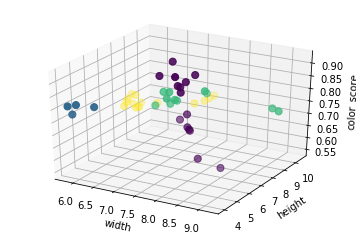

In [22]:
# plot 3d scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c=y_train, marker='o', s=50);
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

### Create train-test split

In [6]:
X = fruits[['mass', 'width', 'height']]
y= fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Create Classifier object

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)


### Train the classifier with training data

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Estimate accuracy of the classifier.

In [12]:
knn.score(X_test, y_test)

0.5333333333333333

### Use the trained k-NN classifier model to classify new, previously unseen objects

In [20]:
fruit_prediction = knn.predict([[20, 4.3, 5.5]]) # mass = 20g, width=4.3, height=5.5
look_up_fruitname[fruit_prediction[0]]

'mandarin'

In [21]:
fruit_prediction = knn.predict([[100, 6.3, 8.5]]) # mass = 20g, width=6.3, height=8.5
look_up_fruitname[fruit_prediction[0]]

'lemon'

C:\Varun\AppliedDataScienceWithPython\Python\Applied_Machine_Learning_in_Python\Week1\adspy_shared_utilities.py:172: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_mat = X[['height', 'width']].as_matrix()
C:\Varun\AppliedDataScienceWithPython\Python\Applied_Machine_Learning_in_Python\Week1\adspy_shared_utilities.py:173: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_mat = y.as_matrix()


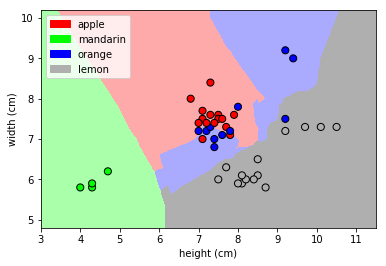

In [25]:
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train, y_train, 5, 'uniform') # uniform value indicates to treat all neighbors equally weighted. We can also use 
# "distance" if we want our calculation to be based upon distance. 

### Accuracy of k-NN classification to the choice of "k" parameter.

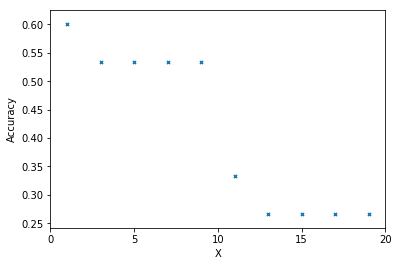

In [42]:
rangevalueofK = range(1, 20, 2)
score=[]
for k in rangevalueofK:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    score.append(knn.score(X_test, y_test))

plt.figure()
plt.scatter(rangevalueofK, score, s=10, marker='x');
plt.xlabel('X');
plt.ylabel('Accuracy');
plt.xticks([0, 5, 10, 15, 20]);

#### How sensitive is k-NN classification accuracy to the train/test split proportion?


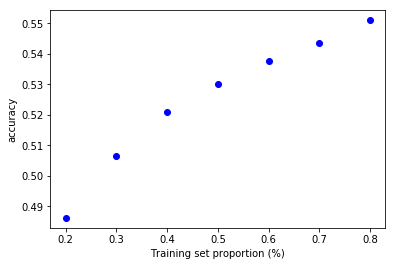

In [49]:
# train_test_split(X, y, test_size=1-s)
s=[0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]
knn = KNeighborsClassifier(n_neighbors = 5)
scores = []
for t in s:
    for i in range(1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-t)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(t, np.mean(scores), 'bo')
plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');
